# STATISTICAL ANALYSIS PPUC

In this part, we would like to test our hypothersis by answering to some  questions. As a reminder, the following are our null and alternative hypothesis.

- Null Hyothesis(Ho) : The price of the used car is not correlated to car mileage, car age, car model and car transmission 

- Alternative hypothesis (H1): There is  a relationship among them 

How are we going to test this hypothesis:

By intuition and by the common sense, we reject the null hypothesis. Then by interpreting the p  value, we will be able to know if we have committed a Type I or type II error.

The main questions related to that hypothesis testing are going to be: 
    1) Is there anay relatioship (association) between those listed features and car price?
    2) If there exists how strong is that relationship?
    3) which feature most insfluences the car price?
    4) can car price be pridected trhoughout those features? if so what's will be the best model?
    
    To answer to these questions we are going to use STATSMODEL AND SCIKIT-LEARN

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')
import seaborn as sb
import os
from shutil import copyfile
from datetime import datetime
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [36]:
# UPLOADING THE DATA SET

Data_Frame = pd.read_csv('C:/Users/emmat/Desktop/database/final_file.csv',  encoding='cp1252' , index_col= False)
Data_Frame.head(5)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,1.8 4 Cylinder Sequential-Port F.I.
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,AUTOMATIC,4WD,Baltimore,MD 21215,3.6L 6 CYL. GAS
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,1.80L I4
3,73566743,Jeep,Grand-Cherokee-Limited,2014,36636,27899,8-Speed Automatic,4WD,Palmyra,PA 17078,3.6L V6 Flex Fuel 24V VVT
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,A,AWD,Doylestown,PA 18902,2.40L I4


In [37]:
print ('This dataset has:', Data_Frame.shape[0], 'rows and', Data_Frame.shape[1], 'columns')

This dataset has: 21142 rows and 11 columns


 ###   A quick remark: 

On the car_transmission valiable, the label "automatic" is materialized by three different symbols: 'Automatic', 'AUTOMATIC', 'A'. First let's uniformize that variale by a unique label "Automatic"

In [38]:
# this dictionary transform all the labels attributed to car_transmission to a unique label

some_changes = {"car_transmission":   
                {"AUTO":"Automatic" , "Automatic CVT":"Automatic",
"AUTOMATIC": "Automatic","A": "Automatic" }}

Data_Frame.replace(some_changes, inplace=True)
Data_Frame.head(3)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,1.8 4 Cylinder Sequential-Port F.I.
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215,3.6L 6 CYL. GAS
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,1.80L I4


####  Now let's check if our new data set is perfectly cleaned (has no missing values and has no duplicates)¶

In [39]:
# checking duplicates rows

Data_Frame.duplicated('car_id').sum()
# the same can be done by the following code : 
# Data_Frame[Data_Frame.isnull().any(axis=1)]

2

####   It appears that we have 2 duplicated rows. This following code is another way to verify that there is 0 duplicated values

In [7]:
Data_Frame [Data_Frame.duplicated(['car_id'], keep=False)]

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
20492,701805568,Ford,Escape,2016,33633,17293,6-Speed Automatic,4WD,Temple Hills,Temple Hills,NaN
20658,701805568,Ford,Escape,2016,33633,17790,6-Speed Automatic,4WD,Temple Hills,Temple Hills,NaN
20679,705830314,Chevrolet,Impala,2001,117241,24500,Automatic,FWD,Marlow Heights,Marlow Heights,NaN
20988,705830314,Chevrolet,Impala,2001,117241,24516,Automatic,FWD,Marlow Heights,Marlow Heights,NaN


In [40]:
#### We can get rid of those duplicated rows. They have different prices and we do not know which price is right
Data_Frame = Data_Frame.drop_duplicates(subset=['car_id'], keep= False)
Data_Frame .shape

(21138, 11)

In [41]:
# In more detail, let see how many null values we get

Data_Frame.isnull().sum()

car_id                 0
car_make               0
car_model              0
car_year               0
car_mileage            0
car_price              0
car_transmission       0
car_driveTrain         0
car_vendor             0
car_location           0
car_engine          4782
dtype: int64

####   car_transmission , car_driveTrain, car_engine  columns still have some missing values. we can drop them

In [43]:
# filling missing values in car_driveTrain and car_transmission

Data_Frame['car_driveTrain'].fillna('FWD', inplace=True)
Data_Frame['car_transmission'].fillna('Automatic', inplace=True)
Data_Frame.head(2)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,1.8 4 Cylinder Sequential-Port F.I.
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215,3.6L 6 CYL. GAS


####   Let's take a look at the shape of the Dataframe

In [44]:
print('Total number of rows', Data_Frame .shape[0])
print ('Total number of columns is now',Data_Frame .shape[1] )

Total number of rows 21138
Total number of columns is now 11


####  We can now check if we have got rid all of the missing values completely

In [45]:
print ("The total number of missing values is:",\
       Data_Frame.car_transmission.isnull().sum())

The total number of missing values is: 0


###  NOW THAT THE DATA SET IS TOTALY CLEANED, LET'S START STATISCAL ANALYSIS

####   Any outliers? Let's look for maximum and minimums on car Price¶

In [46]:
Data_Frame [['car_year', 'car_make','car_model', 'car_mileage','car_price']]\
.sort_values(by='car_price',ascending=True).head(5)

,car_year,car_make,car_model,car_mileage,car_price
21050,2005,Pontiac,Sunfire,168781,700
7463,2003,Ford,Focus-ZTS,202453,1321
4542,2007,Suzuki,Forenza,143177,1499
8433,2001,Saturn,SL2,121095,1899
2982,2002,Mazda,Protege5,166467,1900


#### The above table shows that the minimum value on the car price is 700 dolars. The car that is sold at that price is Pontiac Sunfire, year 2005, with the total mileage of168781  (see table below) which is about right. Thus the price of 700 is about right and cannot be considered as outlier.

In [47]:
Data_Frame.loc[Data_Frame.car_model == "Sunfire"]\
.sort_values(by='car_price',ascending=False).head(3)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
21050,704156158,Pontiac,Sunfire,2005,168781,700,Automatic,FWD,Temple Hills,Temple Hills,NaN


###  Let's now look at the maximum car price value. 

In [49]:
Data_Frame [['car_year', 'car_make','car_model', 'car_mileage','car_price']]\
.sort_values(by='car_price',ascending=False).head(3)

,car_year,car_make,car_model,car_mileage,car_price
16959,2015,Porsche,911,9975,139981
7907,2014,Porsche,911-GT3,10498,137991
13948,2009,Nissan,Gt-R-Premium,7000,135000


####  The maximum value for car_price is139981 and it corresponds to the car make Porsche. When we compare all Porsche pricces (see table below) we notice that price is about right since it corresponds to mileage, the make, the model and the year. so again here, we cannot see these high price values as outliers.

In [50]:
Data_Frame.loc[Data_Frame.car_make == "Porsche"]\
.sort_values(by='car_price',ascending=False).head(3)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
16959,704821718,Porsche,911,2015,9975,139981,Automatic,FWD,Arlington,Arlington,NaN
7907,72981306,Porsche,911-GT3,2014,10498,137991,Dual Shift Gearbox,RWD,West Palm Beach,FL 33409,3.8 6 Cylinder Fuel Injected
15662,67543924,Porsche,911-Turbo,2009,23050,129977,6 Speed Manual Transmission,AWD,North Wales,PA 19454,Flat 6 Cylinder Engine


####  As we can see, the min car price value and the maximum value  make totally sens so we can admit that there is no outliers upon car price


####    Any outliers about car mileage?¶

In [15]:

Data_Frame [['car_year', 'car_model','car_make', 'car_mileage','car_price']]\
.sort_values(by='car_mileage',ascending=True).head(5)

,car_year,car_model,car_make,car_mileage,car_price
14010,2017,Colorado-Work-Truck,Chevrolet,1003,27589
7490,2017,Camry-SE,Toyota,1018,20321
8356,2017,Elantra-SE,Hyundai,1026,15988
9679,2016,Rogue-SL,Nissan,1033,26782
4934,2017,WRX-STI,Subaru,1037,36794


####  For the purpose of the analysis, we have decided to set our features as follow: 

    * Car mileage must be greater than 1000 and less than 220000 
    * Car year must be creater than year 2000 
    * car_price must be less 140000

In [51]:
# setting up  car mileage, car price, car year 

Data_Frame = Data_Frame [(Data_Frame.car_mileage >=1000) & (Data_Frame .car_mileage < 220000)\
                        & (Data_Frame.car_year > 2000)& (Data_Frame.car_price < 140000)]

print ('After all cleanings, there  are:',Data_Frame.shape[1],'columns',
       'and',Data_Frame.shape[0],'rows', 'left.')

After all cleanings, there  are: 11 columns and 21114 rows left.


In [52]:
# we can see the max mileage that we get now

Data_Frame [['car_year', 'car_model','car_make','car_transmission', 'car_mileage','car_price']]\
.sort_values(by='car_mileage',ascending=True).head(3)

,car_year,car_model,car_make,car_transmission,car_mileage,car_price
14010,2017,Colorado-Work-Truck,Chevrolet,Automatic,1003,27589
7490,2017,Camry-SE,Toyota,Shiftable Automatic,1018,20321
8356,2017,Elantra-SE,Hyundai,Automatic,1026,15988


###  we can drop for now the car_engine column. we do not need it for this analysis

In [59]:
Data_Frame = Data_Frame.drop(['car_engine'], axis = 1)
Data_Frame.head(2)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,584,129
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215,2109,129


# let's start some basic statistics

In [60]:
# descriptive statistics for the numerical variables
Data_Frame[['car_mileage', 'car_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
car_mileage,21114.0,43113.954627,32524.654330,1003.0,21478.75,34679.0,53998.75,218950.0
car_price,21114.0,21843.622099,12905.462085,700.0,13981.00,18950.0,26590.00,139981.0


#####   The count of 21114 is the number of istances that we have retained for the rest of   this analysis.

#####   The mean for the car mileage is 43113; which is good as we stick to the fact that our analysis will be based on the used cars only. The mean for the car price is 21843 which is also reasonable.

#####    The maximum car price is 139981 and the min is 700. as we stated above, those values are acceptables

#####  We can take a better look of each of these aggregates upon each car make (see table below) 

In [61]:
Data_Frame.groupby(['car_make'])\
.car_price.agg(['count', 'mean', 'max', 'min','std']).head(3)

,count,mean,max,min,std
car_make,,,,,
Acura,508,24972.177165,50342,4750,8787.177760
Aston Martin,8,80601.500000,121990,49911,26648.906142
Audi,450,34972.833333,134995,4990,18269.042051


#  Let's now start analyzing how variables are related. first we need to know what kind of data types we have

In [62]:
Data_Frame.dtypes

car_id                int64
car_make             object
car_model            object
car_year              int64
car_mileage           int64
car_price             int64
car_transmission     object
car_driveTrain       object
car_vendor           object
car_location         object
model_code            int64
transmission_code     int64
dtype: object

###    we need to transform some categorical features into numerics

In [63]:
## we create a new numeric feature called model_code related to car_model feature

model_coder = LabelEncoder()
Data_Frame['model_code'] = model_coder.fit_transform(Data_Frame.car_model)
model_codes = Data_Frame.model_code.unique()
model_codes_idx = Data_Frame.model_code.values
num_model_codes = len(model_codes)
model_names = Data_Frame.car_model.unique()
Data_Frame.head(2)


,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,584,129
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215,2109,129


In [64]:
## we create a new numeric feature called transmission_code related to car_transmission feature

model_coder = LabelEncoder()
Data_Frame['transmission_code'] = model_coder.fit_transform(Data_Frame.car_transmission)
model_codes = Data_Frame.model_code.unique()
model_codes_idx = Data_Frame.model_code.values
num_model_codes = len(model_codes)
model_names = Data_Frame.car_transmission.unique()
Data_Frame.shape
Data_Frame.tail(2)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code
21140,698122820,Nissan,Rogue,2012,49232,12999,Automatic,FWD,Suitland,Suitland,1684,129
21141,700192874,Nissan,Murano,2014,49456,16999,Automatic,FWD,Suitland,Suitland,1357,129


In [65]:
## we create a new numeric feature called make_code related to car_make feature

model_coder = LabelEncoder()
Data_Frame['make_code'] = model_coder.fit_transform(Data_Frame.car_make)
model_codes = Data_Frame.model_code.unique()
model_codes_idx = Data_Frame.model_code.values
num_model_codes = len(model_codes)
model_names = Data_Frame.car_make.unique()
Data_Frame.shape
Data_Frame.head(2)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code,make_code
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,584,129,48
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215,2109,129,21


### For the purpose of this analysis, let's just only keep object features that we need

In [66]:
# keep float features only

Data = Data_Frame.select_dtypes(include=['int64']).copy()
Data.head()

,car_id,car_year,car_mileage,car_price,model_code,transmission_code,make_code
0,73531922,2015,23036,13298,584,129,48
1,72354903,2012,73619,26995,2109,129,21
2,73704666,2014,27784,14097,525,129,15
3,73566743,2014,36636,27899,1034,108,21
4,73745994,2013,48568,18981,1765,129,17


In [67]:
Data_Frame.groupby('car_make').car_price.mean().head(3)

car_make
Acura           24972.177165
Aston Martin    80601.500000
Audi            34972.833333
Name: car_price, dtype: float64

In [275]:
remind = pd.DataFrame({'continuous':['regression', 'dimension reduction'], 'categorical':
                       ['classification','clustering']}, index = ['supervised', 'unsupervised'])
remind

,categorical,continuous
supervised,classification,regression
unsupervised,clustering,dimension reduction


#              Step 1: variables selection

   This work is based on the ASSUMPTION  that THE USED CAR PRICE IS RELATED TO SOME AGGREGATES LIKE CAR MILEAGE, CAR YEAR, CAR MAKE AND MODEL. 
   Given that assumption, we want to bult a model that predict the used car price. Therefore, we have selected the folowing:

   *  Predicted variables ( X):    car_mileage, car_year, car_make, car_transmission
    
   *  Target variable (Y):   car_price


##         Step 2: Is there any relationship between predected and target vaariables ? If yes, how atrong or weak is the correlation?


###        Pearson correlation table  

In [69]:
# We can run pearson correlation matrix to see how variables are correlated

Data[['car_year', 'car_mileage', 'car_price','make_code','model_code','transmission_code']].corr()

,car_year,car_mileage,car_price,make_code,model_code,transmission_code
car_year,1.000000,-0.741701,0.286364,-0.025312,-0.004977,0.265452
car_mileage,-0.741701,1.000000,-0.411683,0.028890,0.016838,-0.211585
car_price,0.286364,-0.411683,1.000000,-0.077240,0.068258,0.073394
make_code,-0.025312,0.028890,-0.077240,1.000000,0.091621,0.029169
model_code,-0.004977,0.016838,0.068258,0.091621,1.000000,0.007289
transmission_code,0.265452,-0.211585,0.073394,0.029169,0.007289,1.000000


###  Let's visualize the relationship between the features and the response using scatterplots

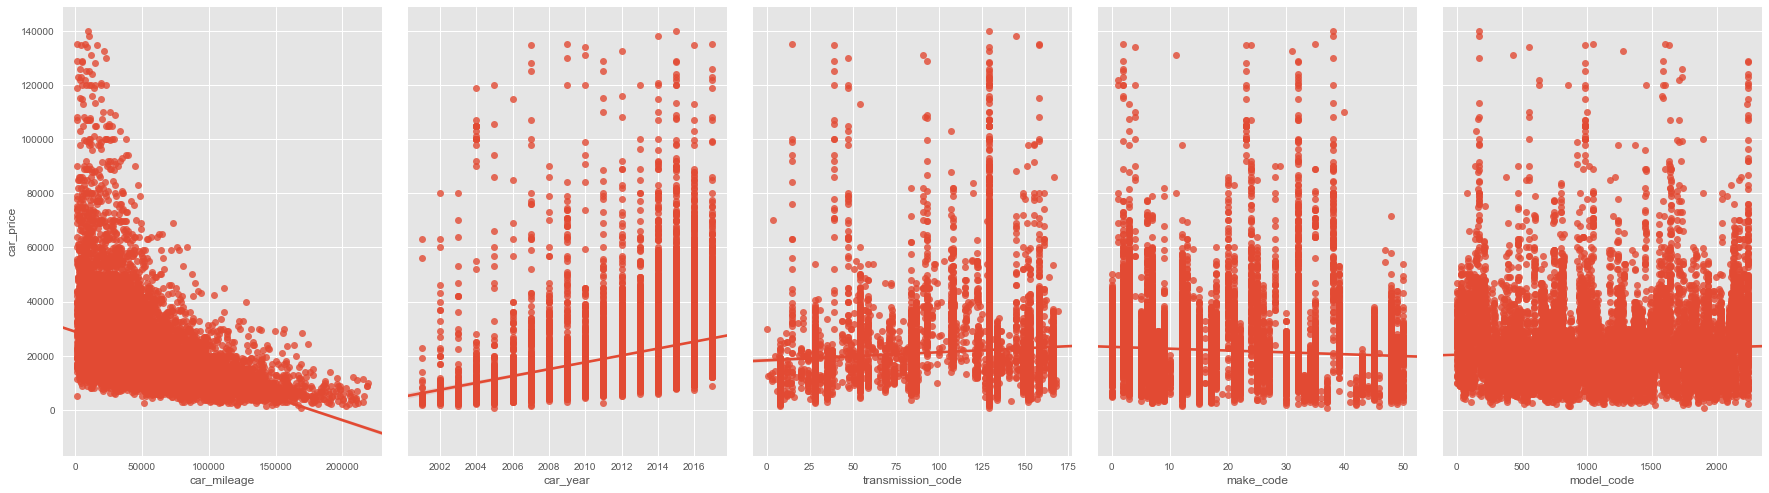

In [159]:
sns.pairplot(Data, x_vars=['car_mileage', 'car_year','transmission_code', 'make_code','model_code']\
             , y_vars = 'car_price', size = 7, aspect =0.7, kind = 'reg')

From the above pearson correlation table we can notice that the coefficient of correlation between car price is negative -0.412 and is not strong enough. the coefficient of correlation between car year and car price is positive 0.29  and is not strong enough neither. From these weak correlation observations observed, we can assume that the car price is correlated to those two variables, but not in the very strong way. The scatterplot can confirm that weak correlation among variables.

# Working on the intire data set can impact the analysis. Let's just select two or three car makes with all the features and study the correlation between those features and the car price. We select randomly 'Hyundai', 'Ford','Toyoya', 'Honda', 'Nissan'. 

In [187]:
# we select a subset from the data set and analysis 
data = Data_Frame[Data_Frame.car_make.isin(['Hyundai', 'Ford','Toyoya', 'Honda', 'Nissan'])] 
data.head(3)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,model_code,transmission_code,make_code
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,525,129,15
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,Automatic,AWD,Doylestown,PA 18902,1765,129,17
5,72021162,Hyundai,Accent-SE,2016,12145,12619,Automatic,FWD,Langhorne,PA 19047,242,129,17


In [188]:
data.shape

(6908, 13)

In [201]:
### correlation between features for a subset made by 'Hyundai', 'Ford','Toyoya', 'Honda', 'Nissan'

data[['car_year', 'car_mileage', 'car_price','model_code','transmission_code']].corr()

,car_year,car_mileage,car_price,model_code,transmission_code
car_year,1.000000,-0.741101,0.380505,0.042379,0.283499
car_mileage,-0.741101,1.000000,-0.433204,-0.044134,-0.237936
car_price,0.380505,-0.433204,1.000000,-0.016257,0.051550
model_code,0.042379,-0.044134,-0.016257,1.000000,0.052233
transmission_code,0.283499,-0.237936,0.051550,0.052233,1.000000


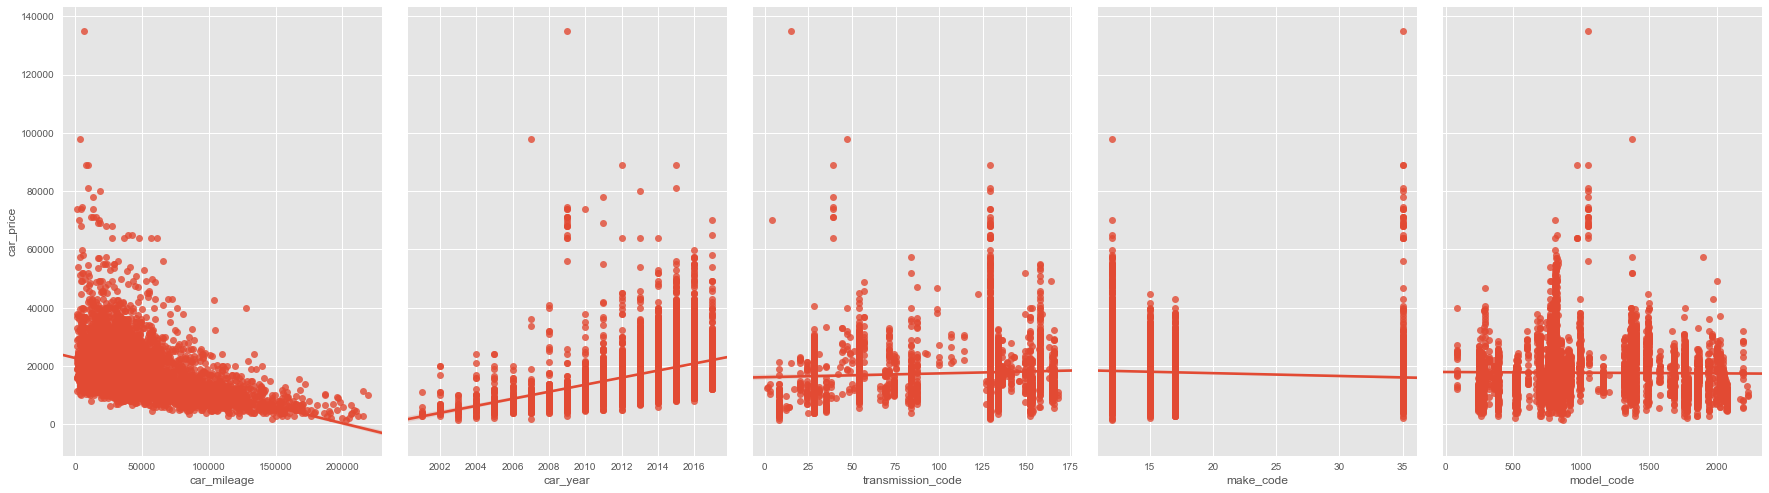

In [157]:
sns.pairplot(data, x_vars=['car_mileage', 'car_year','transmission_code', 'make_code','model_code']\
             , y_vars = 'car_price', size = 7, aspect =0.7, kind = 'reg')

###  The correlation becomes litle more interesting than the correlation made on the intire data set

### Let's go ahead ahead and compare the corelation beatween each of these selected cars mileage and the price

In [202]:
# For Hyundai

Hyundai = data[data.car_make=="Hyundai"]
Hyundai[['car_year', 'car_mileage', 'car_price','model_code','transmission_code']].corr()

,car_year,car_mileage,car_price,model_code,transmission_code
car_year,1.000000,-0.667680,0.480676,-0.026320,0.209329
car_mileage,-0.667680,1.000000,-0.529383,-0.033840,-0.186366
car_price,0.480676,-0.529383,1.000000,0.128162,0.129370
model_code,-0.026320,-0.033840,0.128162,1.000000,0.065736
transmission_code,0.209329,-0.186366,0.129370,0.065736,1.000000


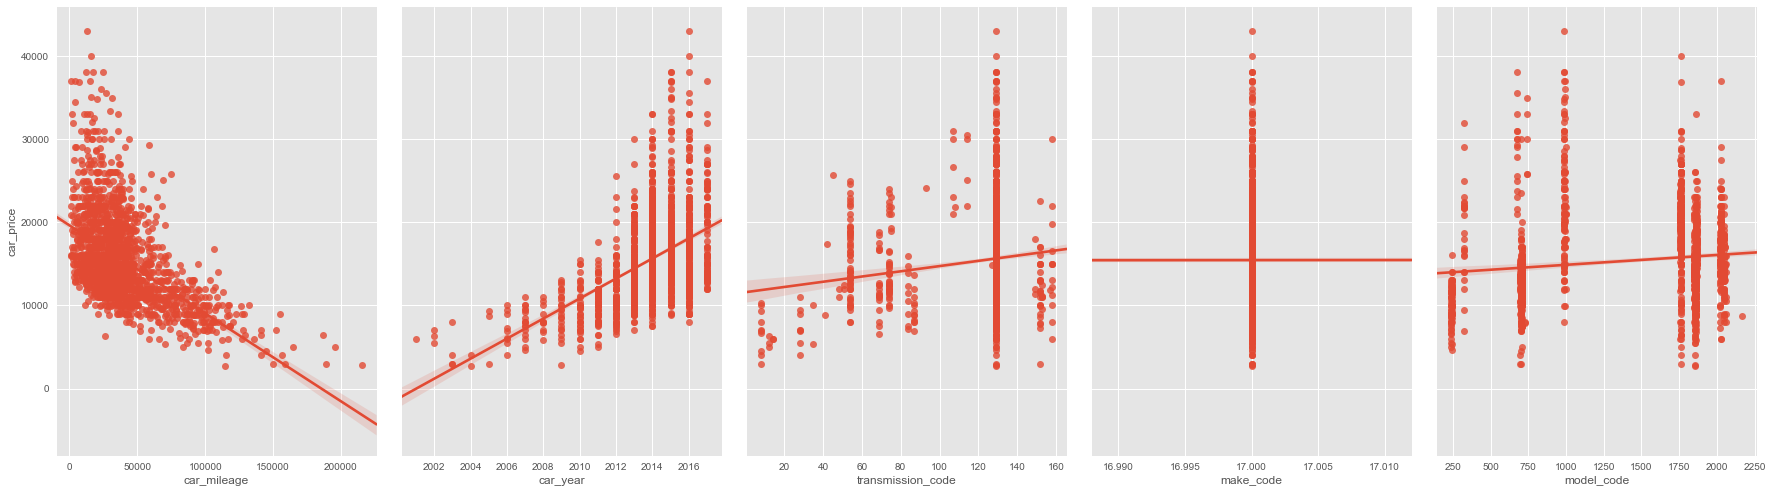

In [203]:
sns.pairplot(Hyundai, x_vars=['car_mileage', 'car_year','transmission_code', 'make_code','model_code']\
             , y_vars = 'car_price', size = 7, aspect =0.7, kind = 'reg')

In [204]:
## For Ford

Ford = Data_Frame[Data_Frame.car_make=="Ford"]
Ford[['car_year', 'car_mileage', 'car_price','model_code','transmission_code']].corr()

,car_year,car_mileage,car_price,model_code,transmission_code
car_year,1.000000,-0.707459,0.408242,-0.027517,0.270895
car_mileage,-0.707459,1.000000,-0.440829,-0.039258,-0.211761
car_price,0.408242,-0.440829,1.000000,-0.052630,0.144005
model_code,-0.027517,-0.039258,-0.052630,1.000000,-0.047247
transmission_code,0.270895,-0.211761,0.144005,-0.047247,1.000000


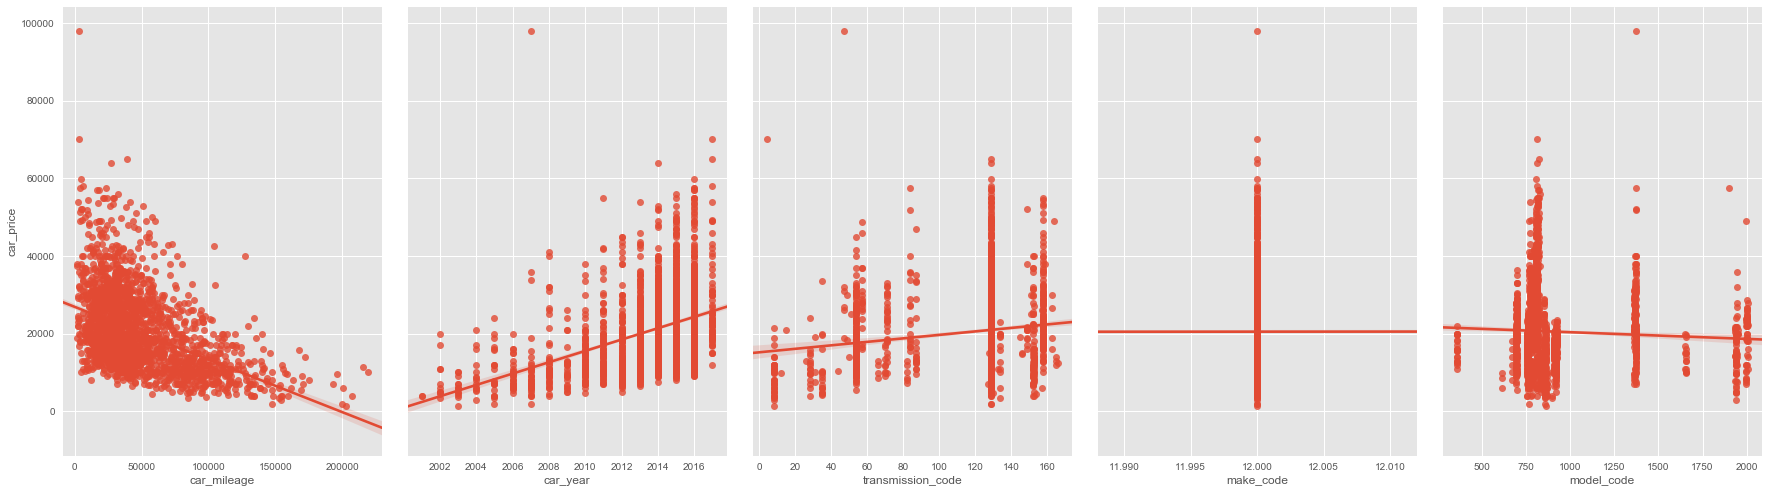

In [205]:
sns.pairplot(Ford, x_vars=['car_mileage', 'car_year','transmission_code', 'make_code','model_code']\
             , y_vars = 'car_price', size = 7, aspect =0.7, kind = 'reg')

In [206]:
# For Toyota

Toyota = Data_Frame[Data_Frame.car_make=="Toyota"]
Toyota[['car_year', 'car_mileage', 'car_price','model_code','transmission_code']].corr()

,car_year,car_mileage,car_price,model_code,transmission_code
car_year,1.000000,-0.835693,0.526293,-0.046117,0.201561
car_mileage,-0.835693,1.000000,-0.518906,0.035342,-0.184582
car_price,0.526293,-0.518906,1.000000,0.244404,0.095203
model_code,-0.046117,0.035342,0.244404,1.000000,0.014980
transmission_code,0.201561,-0.184582,0.095203,0.014980,1.000000


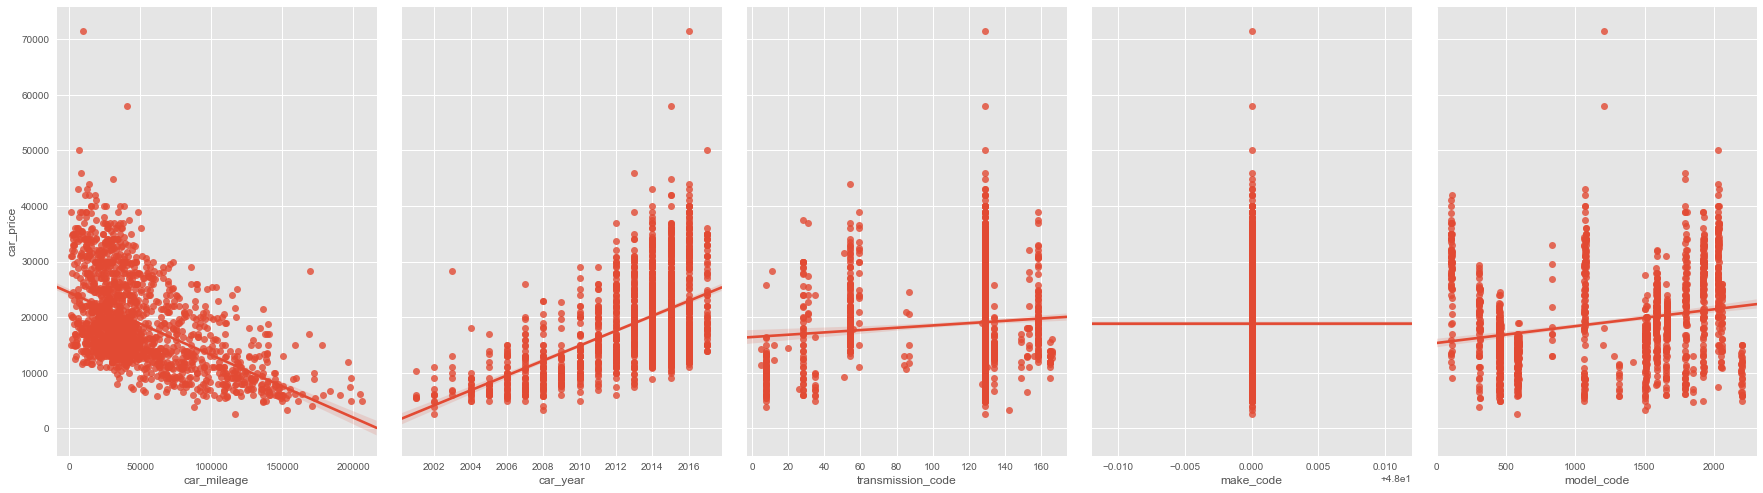

In [207]:
sns.pairplot(Toyota, x_vars=['car_mileage', 'car_year','transmission_code', 'make_code','model_code']\
             , y_vars = 'car_price', size = 7, aspect =0.7, kind = 'reg')

Those different  correlation tables and plots show that the car price is more correlated to car mileage and to car year than other features. in fact, it looks more like the more the car is getting older, the less the price becomes and the higher goes the mileage. The best thing now will be to study or predict the car price given those two features

###    Simple linear regression
It is important to run a linear regression first between the car mileage and the car price as the correlation tables aboves show us that the car priece is related more to car mileage than to any other feature. 

The linear regression approach predicts a quantitative response using a single feature. It takes the following form:  


##   Y = βo + β1 X 

Where 

Y =  response (target);
X =  feature (Predicted)
βo =  is the intercept ( or model coefficient)
β1 =  is the coefficient for x (or model coefficent)

the values of coefficient βo and β1 help to create a model. to estimate the values of these coefficients, we use the 
 least squares criterion, which means we are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

###  Let's use Statsmodels to estimate the model coefficients for the advertising data

###  we limit first our analysis on  car price (target) and car mileage (predicted)


###  the simple linear equation can be written as such:   

##  car_price (Y)  =   βo+ β1. car_mileage (X)


In [209]:
# we use the subset dataset made of Hyundai', 'Ford','Toyoya', 'Honda', 'Nissan'

import statsmodels.formula.api as smf

# find the intercept and the coefficient  βo  
lm = smf.ols(formula='car_price ~ car_mileage', data=data).fit()   ## (create a fitted model in one line)

# print the coefficients
lm.params

Intercept      22750.405635
car_mileage       -0.111869
dtype: float64

###  The simple linear equation can now be written as as follow:   

car_price (or Y)  =   28883  -  0.163249 car_mileage (or X)

###  How do we interpret the car mileage coefficient  ?

 One unit increase in car mileage is associated with a -0.111 unit decrease in car price.
Or more simply, an additional 1,000 miles added to the car is associated with an decrease in car price of 163  dolars.


###   For example we would to predict the saling price using this model when we put  50,000 more miles in a car, 

### manually or with our calculator all we have to do is 

28882 - 0.163249 * 50000 

In [210]:
# we would to predict the saling price using this model when we put 50,000 miles in the car

X_data = pd.DataFrame({'car_mileage': [50000]})  # First we creaet a dataFrame for X 
X_data.head()

,car_mileage
0,50000


In [211]:
# use the model to make predictions on that new value

lm.predict(X_data)

array([ 17156.938019])

The Y intervcept is the value of the car price at the given time (origin) with certain mileage. when we add 50,000 miles on it that origin price decrease approximatively from  22176.790  to 17156 dolars
We can check this on any single car make. 

### Plotting the Least Squares Line¶ 

Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [148]:
# create a DataFrame with the minimum and maximum values of car mileage

X_data = pd.DataFrame({'car_mileage': [Data.car_mileage.min(), Data.car_mileage.max()]})
X_data.head()

,car_mileage
0,1003
1,218950


In [220]:
# make predictions for those x values and store them

preds = lm.predict(X_data)
preds

array([ 17156.938019])

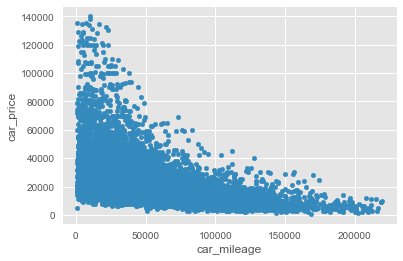

In [221]:
# first, plot the observed data
Data.plot(kind='scatter', x='car_mileage', y='car_price')

# then, plot the least squares line
plt.plot(X_data, preds, c='red', linewidth=7)

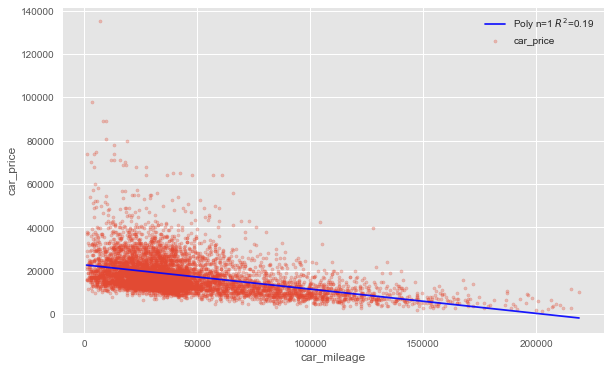

In [222]:
# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(data.car_mileage, data.car_price, s=10, alpha=0.3)
plt.xlabel('car_mileage')
plt.ylabel('car_price')

# points linearlyd space on lstats
x = pd.DataFrame({'car_mileage': np.linspace(Data_Frame.car_mileage.min(), data.car_mileage.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='car_price ~ 1 + car_mileage', data=data).fit()
plt.plot(x.car_mileage, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)


plt.legend()

###    Confidence in our Model :

Is linear regression a high bias/low variance model, or a low bias/high variance model?

Some Answers: High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!


 A closely related concept is confidence intervals. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient.

In [161]:
# print the confidence intervals for the model coefficients

lm.conf_int()

,0,1
Intercept,22443.730703,23057.080566
car_mileage,-0.117360,-0.106379


We know that we only have a single sample of data, and not the entire population of data. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know.

We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within.
Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like

###   Hypothesis Testing and p-values 

In [141]:
# print the p-values for the model coefficients
lm.pvalues

Intercept      0.0
car_mileage    0.0
dtype: float64

By convention we know that if the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05. If the 95% confidence interval does not include zero, the p-value will be less than 0.05.

In conclusion, using those conventions, we admit that a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. 

In our case, the p-value for car mileage is less than 0.05, and so we believe that there is a relationship between car mileage and car price.


## How Well Does the Model Fit the data?

One of the most common way to evaluate the overall fit of a linear model is by the R-squared value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. 

##  Let's calculate the R-squared value for our simple linear model:

In [142]:
# print the R-squared value for the model

lm.rsquared

0.16935170758042528

### interpret the R-squered valued

####  The R-squared is relatively low. But it is now quit clear the value it must take to dray=w a perfect conclusiuon

#       Multiple Linear Regression

###       Y = βo + β1 X1  + β2 X2 + ....

  X's represents features. let's add some more features (car year, car model, car transmission and see if our model fit better)

In [143]:
# create a fitted model with all three features
lm = smf.ols(formula='car_price ~car_mileage + model_code + car_year', data=Data).fit()

# print the coefficients
lm.params

Intercept      420697.826006
car_mileage        -0.176733
model_code          1.502873
car_year         -195.148826
dtype: float64

###  The multilinear equation can be written as such:  

### car_price  =   27238 -0.163. car_mileage + 1.499.car_mileage - 195 car_year

###   How do we interpret these coefficients? 

For a given value of car mileage associated with a given car model and car transmission,  an increase of 1000 miles in that specific car leads to the decrease in car price and the 
A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [144]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              car_price   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1502.
Date:                Sat, 02 Sep 2017   Prob (F-statistic):               0.00
Time:                        11:42:41   Log-Likelihood:            -2.2781e+05
No. Observations:               21118   AIC:                         4.556e+05
Df Residuals:                   21114   BIC:                         4.557e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    4.207e+05   8.31e+04      5.062      0.000      2.58e+05  5.84e+05
car_mileage    -0.1767      0.004    -47.813      0.000        -0.184    -0.169
model_code      1.5029      0.124     12.091      0.000         1.259     1.746
car_year     -195.1488     41.221     -4.734      0.000      -275.946  -114.352
==============================================================================
Omnibus:                    13517.973   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218207.190
Skew:                           2.843   Prob(JB):                         0.00
Kurtosis:                      17.685   Cond. No.                     5.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### What are a few key things we learn from this output?

The p-values for both car_mileage and car_model are below 0.05, Thus we reject the null hypothesis (that there is no association between car price and car mileage associated with car year and fail to reject the null hypothesis for other feactures

This model (multilinear regression has a higher R-squared (0.176) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

###  More analysis on multilinear regression 

In Ordinary Least Squares Regression with a single variable we described the relationship between the predictor and the response with a straight line. In the case of multiple regression we extend this idea by fitting a predictors

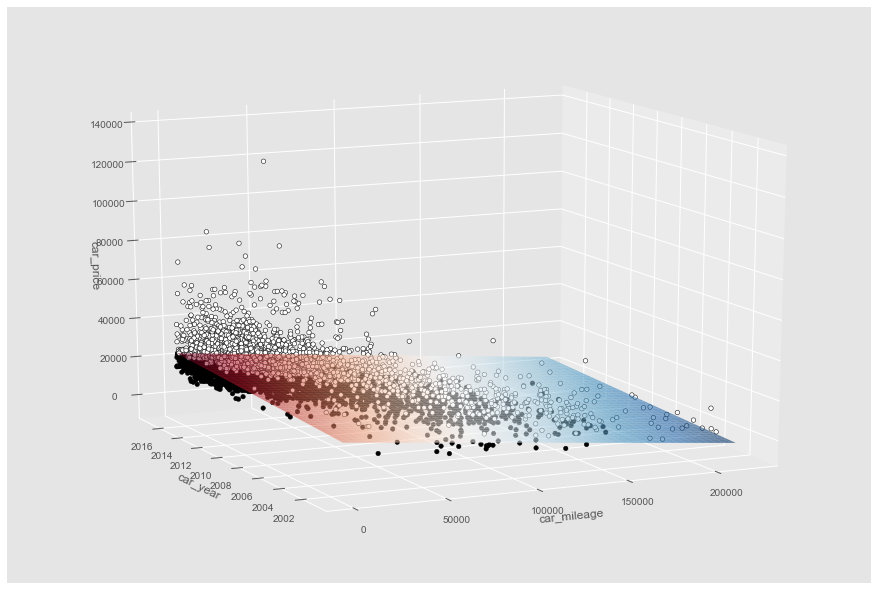

In [163]:
# TODO add image and put this code into an appendix at the bottom
import pandas as pd
import numpy as np
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

X = data[['car_mileage', 'car_year']]
y = data['car_price']

## fit a OLS model with intercept on car mileage and car year
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# mileage/year grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.car_mileage.min(), X.car_mileage.max(), 100), 
                       np.linspace(X.car_year.min(), X.car_year.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].car_mileage, X[resid >= 0].car_year, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].car_mileage, X[resid < 0].car_year, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('car_mileage')
ax.set_ylabel('car_year')
ax.set_zlabel('car_price')

###  The plot above shows data points above the hyperplane in white and points below the hyperplane in black. The color of the plane is determined by the corresonding predicted car price values (blue = low, red = high). we used the subst data set we selected previously.

### Using the same subste, we car compare a the fitting of the line with the linear, quadratic and the polynomial equation

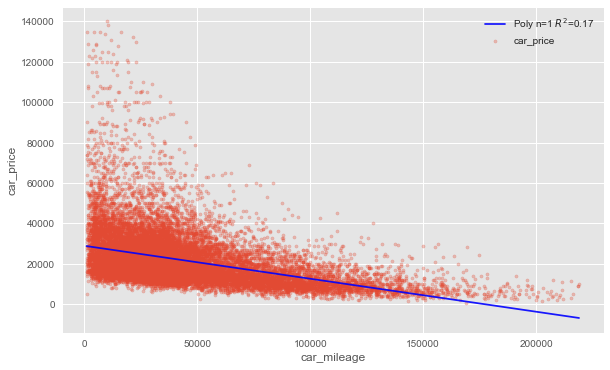

In [168]:
# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(Data_Frame.car_mileage, Data_Frame.car_price, s=10, alpha=0.3)
plt.xlabel('car_mileage')
plt.ylabel('car_price')

# points linearlyd space on lstats
x = pd.DataFrame({'car_mileage': np.linspace(Data_Frame.car_mileage.min(), Data_Frame.car_mileage.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='car_price ~ 1 + car_mileage', data=Data_Frame).fit()
plt.plot(x.car_mileage, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)


plt.legend()

## Quadratic line compared to linear line

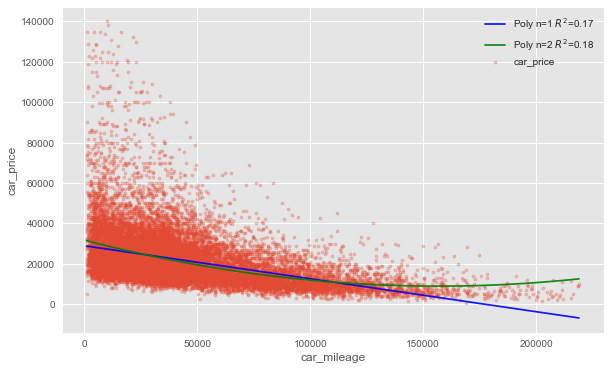

In [169]:
# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(Data_Frame.car_mileage, Data_Frame.car_price, s=10, alpha=0.3)
plt.xlabel('car_mileage')
plt.ylabel('car_price')

# points linearlyd space on lstats
x = pd.DataFrame({'car_mileage': np.linspace(Data_Frame.car_mileage.min(), Data_Frame.car_mileage.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='car_price ~ 1 + car_mileage', data=Data_Frame).fit()
plt.plot(x.car_mileage, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='car_price ~ 1 + car_mileage + I(car_mileage ** 2.0)', data=Data_Frame).fit()
plt.plot(x.car_mileage, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

plt.legend()

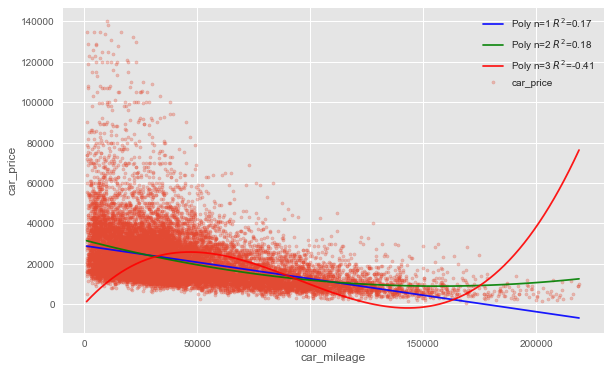

In [171]:
# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(Data_Frame.car_mileage, Data_Frame.car_price, s=10, alpha=0.3)
plt.xlabel('car_mileage')
plt.ylabel('car_price')

# points linearlyd space on lstats
x = pd.DataFrame({'car_mileage': np.linspace(Data_Frame.car_mileage.min(), Data_Frame.car_mileage.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='car_price ~ 1 + car_mileage', data=Data_Frame).fit()
plt.plot(x.car_mileage, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='car_price ~ 1 + car_mileage + I(car_mileage ** 2.0)', data=Data_Frame).fit()
plt.plot(x.car_mileage, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='car_price ~ 1 + car_mileage + I(car_mileage ** 2.0) + I(car_mileage ** 3.0)', data=Data_Frame).fit()
plt.plot(x.car_mileage, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()


'C:\\Users\\emmat\\PPUC---Predictive-Price-Used-Cars'

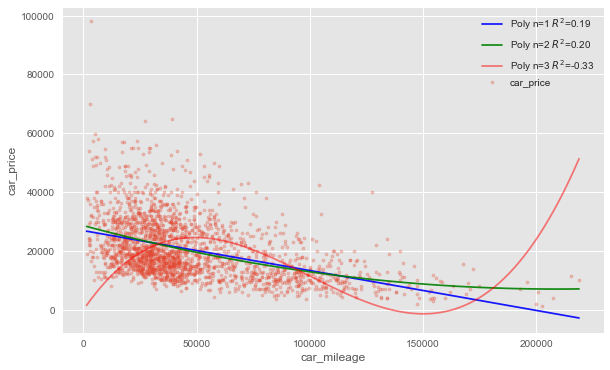

In [186]:
# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(Ford.car_mileage, Ford.car_price, s=10, alpha=0.3)
plt.xlabel('car_mileage')
plt.ylabel('car_price')

# points linearlyd space on lstats
x = pd.DataFrame({'car_mileage': np.linspace(Ford.car_mileage.min(), Ford.car_mileage.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='car_price ~ 1 + car_mileage', data=Ford).fit()
plt.plot(x.car_mileage, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='car_price ~ 1 + car_mileage + I(car_mileage ** 2.0)', data=Ford).fit()
plt.plot(x.car_mileage, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='car_price ~ 1 + car_mileage + I(car_mileage ** 2.0) + I(car_mileage ** 3.0)', data=Ford).fit()
plt.plot(x.car_mileage, poly_3.predict(x), 'r-', alpha=0.5,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

## Features Selection

How do I decide which features to include in a linear model? 
Some suggestions: 

* Try different models, and only keep predictors in the model if they have small p-values.
* Check whether the R-squared value goes up when you add new predictors

R-squared will always increase as you add more features to the model (see below), even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called adjusted R-squared that penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.

The best approach will be the Cross-validation. It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best generalize to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

In [148]:
# only include car_mileage and car_mileage  in the model

lm = smf.ols(formula='car_price ~ car_mileage', data=Data).fit()
lm.rsquared

0.16935170758042528

In [150]:

lm = smf.ols(formula='car_price ~ car_mileage  + car_year' , data=Data).fit()
lm.rsquared

0.1701774274233534

In [155]:
# with four feartures 

lm = smf.ols(formula='car_price ~ car_mileage  + car_year + model_code + make_code' , data=Data).fit()
lm.rsquared

0.18118527179631982

In [157]:
lm.pvalues

Intercept      2.382482e-07
car_mileage    0.000000e+00
car_year       1.405687e-06
model_code     2.539302e-39
make_code      1.755183e-31
dtype: float64

#  Linear Regression in Statsmodels

###  How well does the linear model fit the data?

In [200]:
import statsmodels.api as sm # import statsmodels 

target = pd.DataFrame(Data_Frame.car_price, columns=["car_price"])
X = Data_Frame["car_mileage"] ## X usually means our input variables (or independent variables)
y = target["car_price"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              car_price   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     4305.
Date:                Sun, 03 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:16:42   Log-Likelihood:            -2.2789e+05
No. Observations:               21118   AIC:                         4.558e+05
Df Residuals:                   21116   BIC:                         4.558e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        2.888e+04    134.388    214.920      0.000      2.86e+04  2.91e+04
car_mileage    -0.1632      0.002    -65.613      0.000        -0.168    -0.158
==============================================================================
Omnibus:                    13752.193   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           229790.034
Skew:                           2.901   Prob(JB):                         0.00
Kurtosis:                      18.083   Cond. No.                     8.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  let’s try fitting a regression model with  one variable  

Remarqs about the table: 

* OLS stands for Ordinary Least Squares. 
* The method “Least Squares” means that we are fitting a regression line that would minimize the square of distance from the regression line. 
* 21268 is the number of observations. 
* Df residuals and models relates to the degrees of freedom — “the number of values in the final calculation of a statistic that are free to vary.”

* The coefficient of -0.1556 means that as car_price variable increases by 1, the predicted value of car_mileage increases by -0.1556. A few other important values are the R-squared — the percentage of variance our model explains; the standard error (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); the t scores and p-values, for hypothesis test — the RM has statistically significant p-value; there is a 95% confidence intervals for the RM (meaning we predict at a 95% percent confidence that the value of car_price is between -0.161 and -0.150).

###  Now let’s try fitting a regression model with more than one variable  ( Model fitting is the same)

In [99]:
X = Data_Frame[["car_mileage", "car_year"]]
y = target["car_price"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              car_price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 3.856e+04
Date:                Sat, 26 Aug 2017   Prob (F-statistic):               0.00
Time:                        15:26:31   Log-Likelihood:            -2.2785e+05
No. Observations:               21114   AIC:                         4.557e+05
Df Residuals:                   21112   BIC:                         4.557e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
car_mileage    -0.1624      0.002    -65.337      0.000        -0.167    -0.158
car_year       14.3264      0.067    214.899      0.000        14.196    14.457
==============================================================================
Omnibus:                    13767.347   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           230761.102
Skew:                           2.905   Prob(JB):                         0.00
Kurtosis:                      18.118   Cond. No.                         44.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Here, the model has a much higher R-squared value — 0.735 , meaning that this model explains about 74% of the variance in our dependent variable.  In fact cat_year and car_mileage are statistically significant in predicting (or estimating) the median car_price; not surprisingly , we see that as car_mileage decreases by 1, car_price  will increase by ... 

In [100]:
## Pvalue 

model.pvalues

car_mileage    0.0
car_year       0.0
dtype: float64

# Linear Regression in Scikit-Learn

We need to fit a linear regression model and predict the used car prices using 
the least squares method as the way to estimate the coefficients.

Y = target (car_price)
X = Predictive variables (car_year, car_mileage, car_transmission, car_make)

In [189]:
# Create a python list of  predective features names
feature_cols = ['car_mileage', 'car_year','make_code', 'model_code' ]

# use a list to select a subset of the original DataFrame
X = data[feature_cols]

# We can do these two steppes in one line with the following code:
#      X = Data_Frame[['car_mileage', 'car_year']]

# print the first five rows
X.head()

,car_mileage,car_year,make_code,model_code
2,27784,2014,15,525
4,48568,2013,17,1765
5,12145,2016,17,242
9,31750,2013,17,1860
13,35184,2016,17,1765


In [190]:
# check the type and shape of x
print (type(X))
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
(6908, 4)


In [191]:
# now we select a serie Y from the data frame (Y is the target feature)
Y = data['car_price']

## we could have done also Y= data_Frame.car_price

# print the first 5 rows
Y.head(5)

2     14097
4     18981
5     12619
9     14000
13    18305
Name: car_price, dtype: int64

In [192]:
# check the type and shape of Y
print (type(Y))
print (Y.shape)

<class 'pandas.core.series.Series'>
(6908,)


##  Splitting X and Y into training and testing sets

In [194]:
from sklearn.cross_validation import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, random_state = 1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [195]:
# default split is 75% for training and 25% for testing
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print(Y_test.shape)

(5181, 4)
(1727, 4)
(5181,)
(1727,)


###      now that everything is set, we can  built the linear regression model 

In [196]:
# we import the model first

from sklearn.linear_model import LinearRegression

# im=ntantiate the model
linreg = LinearRegression()

# fit the model to the training data(Learn the coefficient)
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###  interpret model coefficients

In [197]:
# print the intercept and the coefficient

print('the Y intercept is :', linreg.intercept_)
print ('the coefficients  are :', linreg.coef_)

the Y intercept is : -818528.382348
the coefficients  are : [ -8.80265695e-02   4.18474961e+02  -1.11269618e+02  -2.96498881e-01]


In [200]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

linreg = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(linreg, data.car_mileage,  cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

TypeError: fit() missing 1 required positional argument: 'y'

### Pair our chosen features names with the coefficients

In [79]:
zip(linreg.coef_ ,linreg.coef_)

  Our linear regression model equation can be writting as such:

  Y =  - 0.163 (car_mileage)  - 120.87 (car_year)  + 272507

How to interpret these coefficients?


###  Conclusion:


In [ ]:
num_var = {"car_make": {"Acura": 0, "Audi": 1,"BMW": 2,"Cadillac":4,"Chevrolet":5, "Dodge":7,"MINI ":8,"Mercedes-Benz":9, 
                        "Nissan ":10,"Porsche":11, "Subaru":12, "Toyota":13,"Volkswagen":14,"Volvo":15,
                        "Buick ":16, "Chrysler":17,"FIAT":18,"Ford ":19, "Nissan":20, "Chrysler":17,"FIAT":18,"Ford ":19}, 
            
                "car_transmission": {"Automatic": 1, "A": 1,"8-Speed Shiftable Automatic":0,"NaN":0,
                                    "Shiftable Automatic":1,"AUTO":1, "AUTOMATIC": 1,"Dual Shift Gearbox":0,
                                     "6-Speed Shiftable Automatic":0,"8-Speed Automatic":0,"Not Specified":0,"CVT":0,
                                     "6-Speed Automatic":0, "6 SP SHIFTABLE AUTO":0,"5-Speed Automatic":0,"NaN":0,
                                     "4-Speed Automatic":0, "Variable": 0, "9-Speed Shiftable Automatic":0, "Automatic CVT":1}}

## References: 
    

1) Kevin Markham:  http://www.dataschool.io ( https://www.youtube.com/watch?v=3ZWuPVWq7p4&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=6)

2) Mastering Machine Learning with scikit-learn, 
Apply effective learning algorithms to real-world problems using scikit-learn

Gavin Hackeling

